# esssential libraries


In [1]:
!pip install qiskit qiskit-nature qiskit-aer qiskit-ibm-runtime
!pip install pylatexenc
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install qiskit-ibm-provider
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.2/353.2 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 

# multi bit qrng

In [42]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator , Aer
import numpy as np

n_bits = 8  # Choose the number of bits you want
qc = QuantumCircuit(n_bits, n_bits)

# Apply Hadamard to all qubits to create superposition
for i in range(n_bits):
    qc.h(i)
    qc.measure(i, i)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1)
result = job.result()
counts = result.get_counts()

# Extract the binary string from result
random_bin = list(counts.keys())[0]
print(f"Random {n_bits}-bit binary: {random_bin}")

Random 8-bit binary: 01001110


# code valdation and entropy check

Sample bitstrings: [('00010100', 3), ('01001111', 2), ('10101100', 3), ('11001101', 1), ('10100010', 4)]

Bit Position | Frequency of 1s
           0 | 0.482
           1 | 0.528
           2 | 0.499
           3 | 0.512
           4 | 0.530
           5 | 0.520
           6 | 0.487
           7 | 0.461


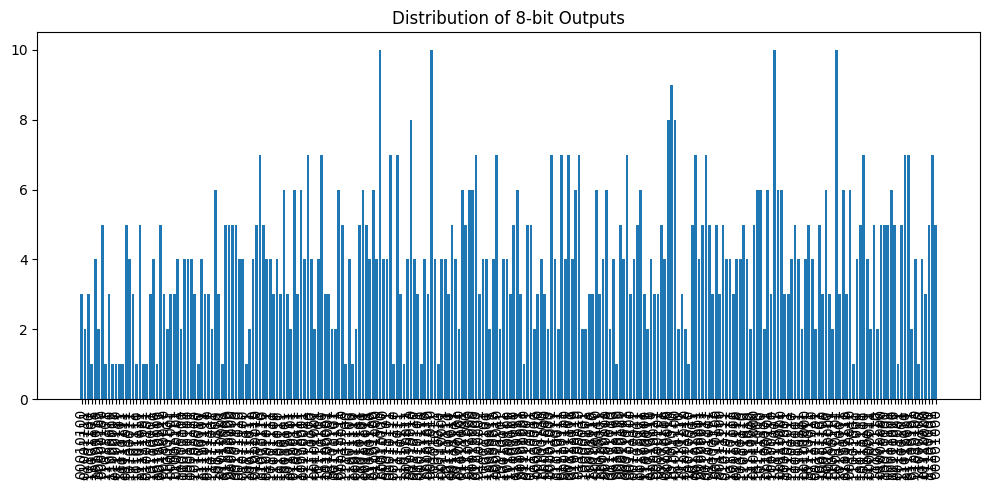


Entropy: 7.797 bits (max: 7.966)


In [3]:

from collections import Counter
import matplotlib.pyplot as plt
import math

n_bits = 8
shots = 1000  # Number of samples to test randomness

# Create circuit
qc = QuantumCircuit(n_bits, n_bits)
qc.h(range(n_bits))
qc.measure(range(n_bits), range(n_bits))

# Run on simulator
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=shots)
result = job.result()
counts = result.get_counts()

# Display a few samples
print("Sample bitstrings:", list(counts.items())[:5])

#  BIT-BY-BIT frequency analysis
bit_counts = [0] * n_bits  # Count of 1s per bit position

for bitstring, freq in counts.items():
    for i, bit in enumerate(reversed(bitstring)):  # reverse to match qubit order
        bit_counts[i] += int(bit) * freq

# Normalize to percentage
bit_freqs = [count / shots for count in bit_counts]

print("\nBit Position | Frequency of 1s")
for i, freq in enumerate(bit_freqs):
    print(f"{i:>12} | {freq:.3f}")

#  Byte distribution (uniformity check)
plt.figure(figsize=(10, 5))
plt.bar(counts.keys(), counts.values())
plt.title("Distribution of 8-bit Outputs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#  Shannon Entropy
def entropy(counts, total_shots):
    return -sum((v / total_shots) * math.log2(v / total_shots) for v in counts.values())

entropy_value = entropy(counts, shots)
max_entropy = math.log2(len(counts))  # Should approach 8 for 8-bit output

print(f"\nEntropy: {entropy_value:.3f} bits (max: {max_entropy:.3f})")